<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Tarea_5/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicios: Mínimos cuadrados

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**1.** Se tiene tres líneas en $\mathbb{R}^2$:

 \begin{align}
  2x-y
  &= 2
  \\
  x+2y
  &= 1
  \\
  x+y
  &= 4
\end{align}

**(a)** Con el método de mínimos cuadrados encuentre el punto común a las 3 líneas. Grafique las tres líneas y el punto solución, ¿qué interpretación puede dar?

**(b)** Realice una búsqueda iterativa entre $-5\leq x \leq 5$ y $-5\leq y \leq 5$ con un paso de $h= 0.01$ para encontrar la menor distancia del problema. Grafique la distancia y compare con el resultado obtenido con mínimos cuadrados.
\begin{align}
 min(||\mathbb{A}\vec{x} - \vec{b}||)
\end{align}


In [ ]:
A=np.array([[2,-1],[1,2],[1,1]])
b=np.array([2,1,4])

In [ ]:
x_minimoscuadrados= np.linalg.inv(A.T @ A) @ (A.T @ b)

val_x = np.linspace(-5, 5, 400)

y1 = 2 * val_x - 2
y2 = (1 - val_x) / 2
y3 = 4 - val_x


Punto obtenido con mínimos cuadrados: [1.42857143 0.42857143]


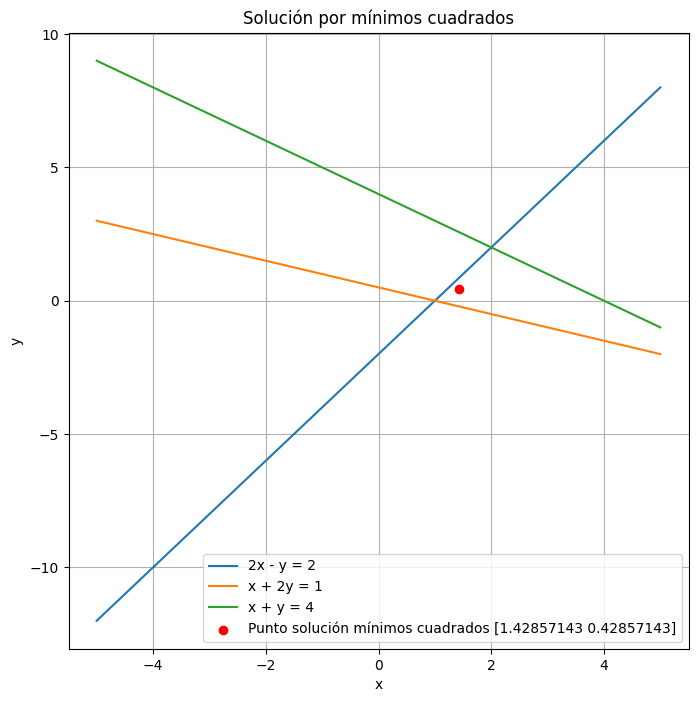

In [ ]:
print(f"Punto obtenido con mínimos cuadrados: {x_minimoscuadrados}")
plt.figure(figsize=(8, 8))
plt.plot(val_x, y1, label="2x - y = 2")
plt.plot(val_x, y2, label="x + 2y = 1")
plt.plot(val_x, y3, label="x + y = 4")
plt.scatter(x_minimoscuadrados[0], x_minimoscuadrados[1], color='red', label=f"Punto solución mínimos cuadrados {x_minimoscuadrados}")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Solución por mínimos cuadrados')
plt.grid(True)
plt.show()

In [ ]:
x_range = np.arange(-5, 5, 0.01)
y_range = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x_range, y_range)

def distancia(A, b, x, y):
    vec_x = np.array([x, y])
    return np.linalg.norm(A @ vec_x - b)

Z = np.zeros((len(y_range), len(x_range)))

for i in range(len((y_range))):
    y=y_range[i]
    for j in range(len((x_range))):
        x=x_range[j]
        Z[i, j] = distancia(A, b, x, y)

min_dist_index = np.unravel_index(np.argmin(Z), Z.shape)
min_point = (x_range[min_dist_index[1]], y_range[min_dist_index[0]])
min_distance = Z[min_dist_index]

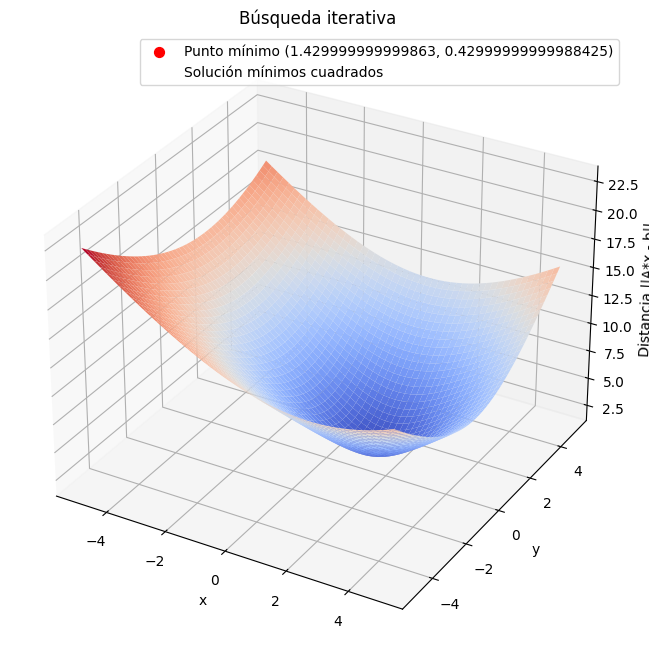

Punto obtenido con mínimos cuadrados: [1.42857143 0.42857143]
Punto obtenido con búsqueda iterativa: (1.429999999999863, 0.42999999999988425) con distancia mínima: 2.5354683985409867


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none', alpha=0.99)

ax.scatter(min_point[0], min_point[1], min_distance, color='red', s=50, label=f"Punto mínimo {min_point}", zorder=5)
ax.scatter(x_minimoscuadrados[0], x_minimoscuadrados[1], Z.min(), color='white', s=50, label="Solución mínimos cuadrados", zorder=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Distancia ||A*x - b||')
ax.set_title('Búsqueda iterativa')
ax.legend()
plt.show()


print(f"Punto obtenido con mínimos cuadrados: {x_minimoscuadrados}")
print(f"Punto obtenido con búsqueda iterativa: {min_point} con distancia mínima: {min_distance}")

**2.** Descargue los datos: https://github.com/asegura4488/Database/blob/main/MetodosComputacion/MinimosLineal.txt . Realice el ajuste usando el método de mínimos cuadrados para encontrar los parámetros de:

\begin{align}
 f(x)=a_0 + a_1x
\end{align}

Grafique los datos y el ajuste mostrando el valor de las contastes en la etiqueta de la gráfica.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Data")
!ls

 DatosRegresion.csv   MediaMovilData.csv     'MinimosLineal (1).txt'
 Exponencial.dat      MinimosCuadratico.txt   MinimosLineal.txt


In [ ]:
file = 'MinimosLineal.txt'
file

'MinimosLineal.txt'

In [ ]:
'/content/drive/MyDrive/Colab Notebooks/Data'

'/content/drive/MyDrive/Colab Notebooks/Data'

In [ ]:
data = pd.read_csv(file,sep=' ')
data.columns = ['x','y']
x = np.array(data['x'])
y = np.array(data['y'])
print(x)
print(y)

[ 1.052632  2.105263  3.157895  4.210526  5.263158  6.315789  7.368421
  8.421053  9.473684 10.52632  11.57895  12.63158  13.68421  14.73684
 15.78947  16.84211  17.89474  18.94737  20.      ]
[-4.06587    0.1796494  2.719807   2.878523   4.527426   8.827734
 10.97722   11.79944   14.52931   17.22463   21.0981    20.79109
 26.08018   26.00302   30.14533   29.14247   33.28434   34.50524
 36.56262  ]


El polinomio ajustado es: 2.13074681641327*x - 5.20732249057208


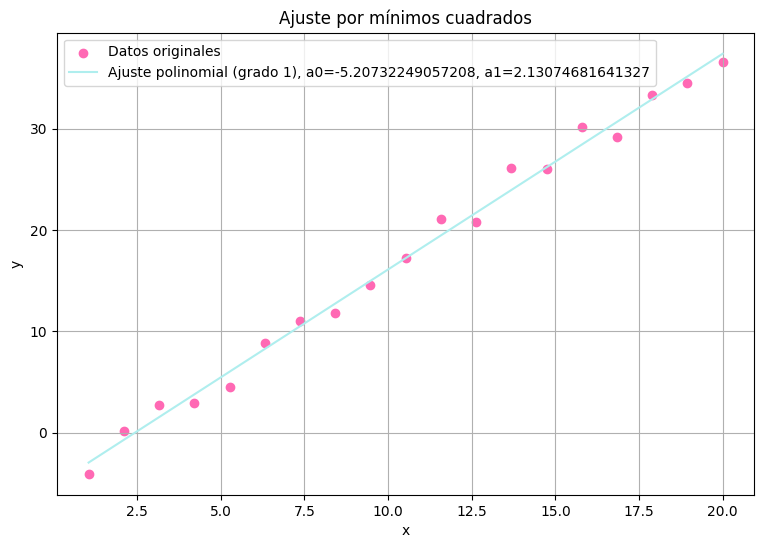

In [ ]:

def GetFit(x, y, n=2):
    l = x.shape[0]
    A = np.ones((l, n+1))
    for i in range(1, n+1):
        A[:, i] = x**i

    AT = np.dot(A.T, A)
    bT = np.dot(A.T, y)
    xsol = np.linalg.solve(AT, bT)

    return xsol


def GetModel(x, p):
    y = 0
    for n in range(len(p)):
        y += p[n] * x**n
    return y

n = 1
xsol = GetFit(x, y, n=n)

_x = np.linspace(np.min(x), np.max(x), 50)
_y = GetModel(_x, xsol)

X = sym.Symbol('x')
polinomio_simbolico = GetModel(X, xsol)

poly = sym.Poly(polinomio_simbolico, X)
coeficientes = poly.coeffs()

print(f"El polinomio ajustado es: {sym.simplify(polinomio_simbolico)}")

plt.figure(figsize=(9, 6))
plt.scatter(x, y, label='Datos originales', color='hotpink')
plt.plot(_x, _y, label=f'Ajuste polinomial (grado {n}), a0={coeficientes[1]}, a1={coeficientes[0]}', color='paleturquoise')
plt.title('Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**3.** Descargue los datos: https://github.com/asegura4488/Database/blob/main/MetodosComputacion/MinimosCuadratico.txt . Realice el ajuste usando el método de mínimos cuadrados para encontrar los parámetros de:

\begin{align}
 f(x) = a_0 + a_1x + a_2x^2
\end{align}

Grafique los datos y el ajuste mostrando el valor de las constantes en la etiqueta de la gráfica.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Data")
!ls

 DatosRegresion.csv   MediaMovilData.csv     'MinimosLineal (1).txt'
 Exponencial.dat      MinimosCuadratico.txt   MinimosLineal.txt


In [ ]:
file = 'MinimosCuadratico.txt'
file

'MinimosCuadratico.txt'

In [ ]:
'/content/drive/MyDrive/Colab Notebooks/Data'

'/content/drive/MyDrive/Colab Notebooks/Data'

[ 0.5263158  1.052632   1.578947   2.105263   2.631579   3.157895
  3.684211   4.210526   4.736842   5.263158   5.789474   6.315789
  6.842105   7.368421   7.894737   8.421053   8.947368   9.473684
 10.       ]
[ 10.779    13.12721  21.20879  20.63223  34.11089  60.66644  55.07888
  81.89598  96.83438 117.5549  130.5394  147.7079  185.1728  210.7779
 235.0856  266.336   297.0943  322.7923  352.3838 ]


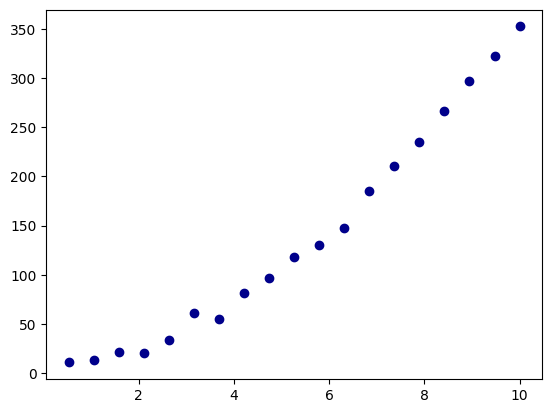

In [ ]:

data = pd.read_csv(file,sep=' ')
data.columns = ['x','y']
x = np.array(data['x'])
y = np.array(data['y'])
print(x)
print(y)
plt.scatter(x,y,color='darkblue')

In [ ]:
def GetFit(x,y,n=2):
  l = x.shape[0]
  b = y
  A = np.ones((l,n+1))
  for i in range(1,n+1):
    A[:,i] = x**i
  # Ajuste
  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)
  xsol = np.linalg.solve(AT,bT)
  return xsol

def GetModel(x,p):
  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n
  return y

In [ ]:
xsol = GetFit(x,y)
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,xsol)
import sympy as sym
X = sym.Symbol('x')
Model=GetModel(X,xsol)
Model

3.04171870549847*x**2 + 5.04229284016467*x + 3.91439387638529

In [ ]:
poly = sym.Poly(Model, X)
coeficientes = poly.coeffs()

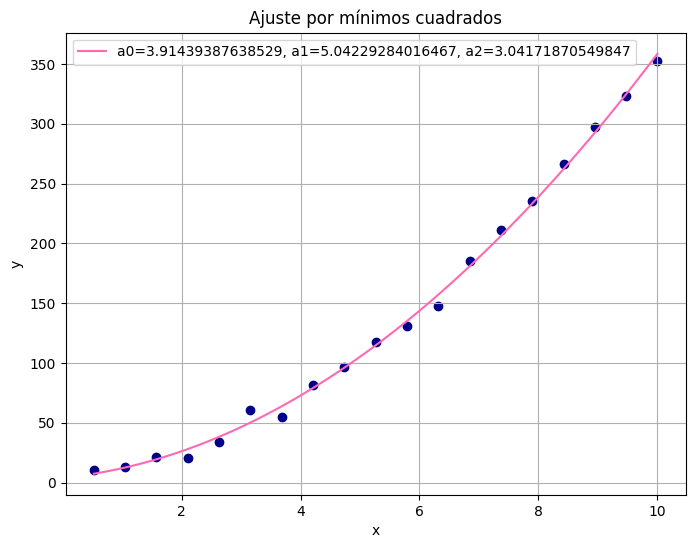

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x,y,color='darkblue', label='datos')
plt.plot(_x,_y,color='hotpink', label=f'a0={coeficientes[2]}, a1={coeficientes[1]}, a2={coeficientes[0]}')
plt.title('Ajuste por mínimos cuadrados')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

**4.** Utilice el método **curve_fit** de **Python** para obtener los dos ajustes. Compare con los resultados anteriores.

In [ ]:
import scipy as sp
from scipy.optimize import curve_fit

file_c = 'MinimosCuadratico.txt'
file_l = 'MinimosLineal.txt'

data_c = pd.read_csv(file_c,sep=' ')
data_c.columns = ['x','y']
x_c = np.array(data_c['x'])
y_c = np.array(data_c['y'])

data_l = pd.read_csv(file_l,sep=' ')
data_l.columns = ['x','y']
x_l = np.array(data_l['x'])
y_l = np.array(data_l['y'])

In [ ]:
def curva_cuadratica(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2
def lineal(x, a0, a1):
    return a0 + a1 * x

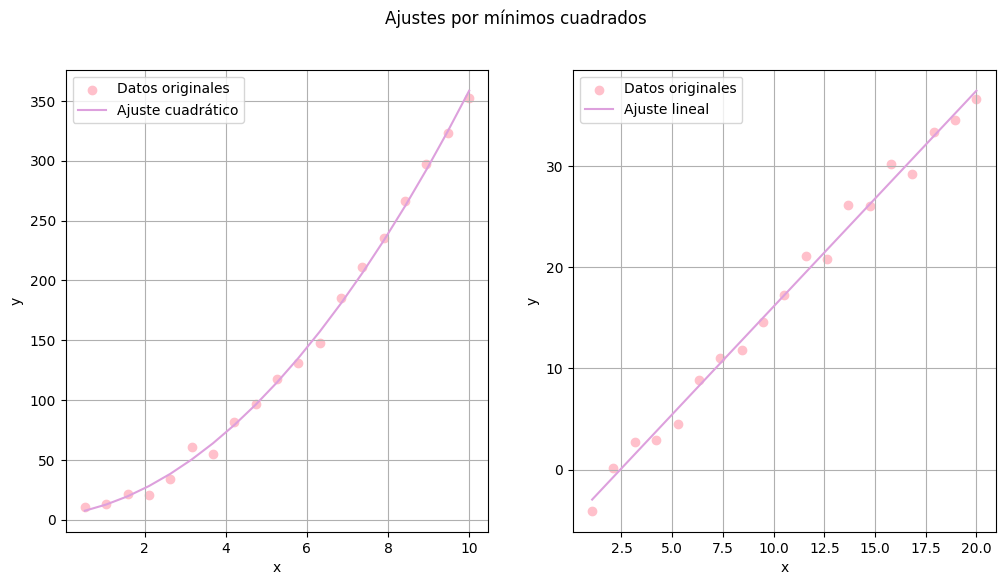

In [ ]:
popt_c, pcov_c = curve_fit(curva_cuadratica, x_c, y_c)
popt_l, pcov_l = curve_fit(lineal, x_l, y_l)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Ajustes por mínimos cuadrados')
ax[0].scatter(x_c, y_c, label='Datos originales', color='pink')
ax[0].plot(x_c, curva_cuadratica(x_c, *popt_c), label=f'Ajuste cuadrático', color='plum')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()
ax[0].grid(True)
ax[1].scatter(x_l, y_l, label='Datos originales', color='pink')
ax[1].plot(x_l, lineal(x_l, *popt_l), label=f'Ajuste lineal', color='plum')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()
ax[1].grid(True)
plt.show()

In [ ]:
print(f'Las constantes halladas con curve_fit son:\nPara el ajuste cuadrático (a0,a1,a2):{popt_c} \nPara el ajuste lineal (a0,a1):{popt_l}')

Las constantes halladas con curve_fit son:
Para el ajuste cuadrático (a0,a1,a2):[3.91439348 5.04229318 3.04171867] 
Para el ajuste lineal (a0,a1):[-5.20732248  2.13074682]


Los parámetros obtenidos para el ajuste cuadrático con mínimos cuadrados: $a_0=3.91439387638529, a_1=5.04229284016467, a_2=3.04171870549847$

Los parámetros obtenidos para el ajuste cuadrático con curve_fit:   
$a_0= 3.91439348, a_1= 5.04229318, a_2= 3.04171867$       


Los parámetros obtenidos para el ajuste lineal con mínimos cuadrados:

$a_0=-5.20732249057208, a_1=2.13074681641327$

Los parámetros obtenidos para el ajuste lineal con curve_fit:

$a_0= -5.20732248, a_1=2.13074682$

Aunque en todos los parámetros hay pequeñas variaciones con respecto al método usado, los valores son bastante similares entre sí.

Encontrar la configuración que adopta un sistema de N=50 partículas que interacutan con un potencial de lennar Jonnes. Use el algoritmo genético para minimizar la energía total del sistema: Use la siguiente definición de potencial y de energía: (Estos no son métodos de clase , Cuidado!)



```python
def LennardJones(r, epsilon=1, sigma=1):
    """
    Potencial de Lennard-Jones para dos partículas a una distancia r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def TotalEnergy(positions, epsilon=1, sigma=1):
    """
    Calcula la energía total de un sistema de partículas en posiciones dadas.
    """
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])  # Distancia entre partículas
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy
```



Epoch 1/500, Best Energy: -10.897362954386557
Epoch 2/500, Best Energy: -10.524557892745559
Epoch 3/500, Best Energy: -11.79778378166992
Epoch 4/500, Best Energy: -11.797123971942828
Epoch 5/500, Best Energy: -11.954045839726339
Epoch 6/500, Best Energy: -11.524844418238443
Epoch 7/500, Best Energy: -11.761725102064533
Epoch 8/500, Best Energy: -11.552515341215075
Epoch 9/500, Best Energy: -11.701989686161753
Epoch 10/500, Best Energy: -11.806911706785998
Epoch 11/500, Best Energy: -11.854508356059533
Epoch 12/500, Best Energy: -14.638465884046063
Epoch 13/500, Best Energy: -15.18725739746271
Epoch 14/500, Best Energy: -15.061632663072851
Epoch 15/500, Best Energy: -15.234475676997702
Epoch 16/500, Best Energy: -15.52357021420573
Epoch 17/500, Best Energy: -15.572293698299996
Epoch 18/500, Best Energy: -15.016950401005419
Epoch 19/500, Best Energy: -14.56049218092019
Epoch 20/500, Best Energy: -21.91104283410935
Epoch 21/500, Best Energy: -21.968623463203237
Epoch 22/500, Best Energy: 

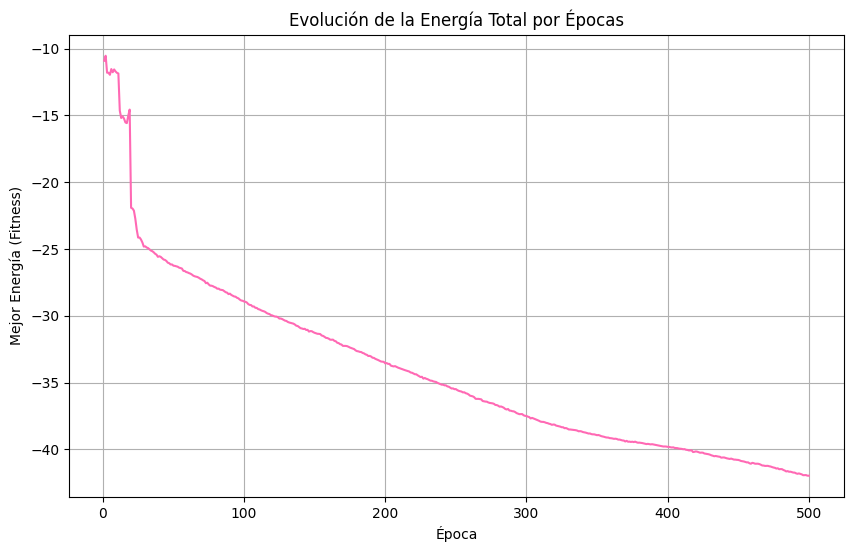

Posiciones óptimas de las partículas:
[[9.10932588 7.50529606 0.04715701]
 [3.18450277 3.87561035 8.67135395]
 [2.12910338 8.35854623 2.19718781]
 [3.48116812 2.6801566  9.8816852 ]
 [3.10390081 6.97564252 7.36881123]
 [6.33085746 4.11096542 2.85336962]
 [1.08245343 9.61952642 4.33624638]
 [3.82658046 0.87357357 6.39425515]
 [4.02498827 3.52685583 9.33849124]
 [4.06634594 2.7987543  2.23017874]
 [5.05976447 5.63272002 1.09022484]
 [6.94964179 1.3182839  6.69759801]
 [0.88986031 3.1465032  2.10133166]
 [3.69651003 0.23230818 1.92836324]
 [2.07546985 7.20364401 7.39993206]
 [9.94561422 5.81801195 1.07243419]
 [6.40754706 7.59125522 8.62847349]
 [9.65527886 6.0831429  9.22098383]
 [4.48567745 0.97211058 4.74321662]
 [2.60896399 8.15323731 7.04708657]
 [1.46513374 6.81763495 4.79352156]
 [6.71900922 2.32670644 1.85575175]
 [4.81702933 2.41037502 9.49162767]
 [3.03089426 0.05650793 3.71738023]
 [3.33835184 2.71962956 4.29882847]
 [3.68629789 2.662163   8.80722871]
 [3.14894441 8.19732401 5.

In [ ]:
#código 1
import numpy as np
import matplotlib.pyplot as plt

def LennardJones(r, epsilon=1, sigma=1):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def TotalEnergy(positions, epsilon=1, sigma=1):
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy

class Robot:
    def __init__(self, positions, Id=0, rate=0.1):
        self.Id = Id
        self.rate = rate
        self.positions = positions
        self.energy = TotalEnergy(self.positions)
        self.fitness = self.energy

    def Mutate(self):

        mutation = np.random.normal(loc=0., scale=self.rate, size=self.positions.shape)
        self.positions += mutation
        self.energy = TotalEnergy(self.positions)

    def SetFitness(self):

        self.fitness = self.energy

        if self.fitness < 0.05:
            self.rate = 0.005

    def GetFitness(self):
        return self.fitness

    def GetPositions(self):
        return self.positions



def genetic_algorithm(num_robots, num_epochs, N):
    robots = [Robot(np.random.uniform(-5, 5, (N, 3))) for _ in range(num_robots)]

    best_fitness_per_epoch = []

    for epoch in range(num_epochs):

        for robot in robots:
            robot.Mutate()
            robot.SetFitness()


        robots = sorted(robots, key=lambda r: r.GetFitness())
        best_robot = robots[0]


        best_fitness_per_epoch.append(best_robot.GetFitness())

        print(f"Epoch {epoch+1}/{num_epochs}, Best Energy: {best_robot.GetFitness()}")


        half = num_robots // 2
        for i in range(half, num_robots):
            robots[i].positions = (robots[i - half].GetPositions() + robots[(i - half + 1) % half].GetPositions()) / 2
            robots[i].SetFitness()


    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), best_fitness_per_epoch, linestyle='-', color='hotpink')
    plt.xlabel('Época')
    plt.ylabel('Mejor Energía (Fitness)')
    plt.title('Evolución de la Energía Total por Épocas')
    plt.grid(True)
    plt.show()

    best_system = min(population, key=lambda x: x.GetEnergy())
    print("Posiciones óptimas de las partículas:")
    print(best_system.GetPositions())
    print("Energía mínima alcanzada:", best_system.GetEnergy())


N = 50
num_robots = 50
num_epochs = 500

genetic_algorithm(num_robots, num_epochs, N)

Epoch 1/500, Best Energy: -7.998503723308651
Epoch 2/500, Best Energy: -3.753929778090463
Epoch 3/500, Best Energy: -10.574318562806376
Epoch 4/500, Best Energy: -10.527213550260988
Epoch 5/500, Best Energy: -14.119075720854081
Epoch 6/500, Best Energy: -16.08035044959075
Epoch 7/500, Best Energy: -10.80066190211017
Epoch 8/500, Best Energy: -10.688952131513814
Epoch 9/500, Best Energy: -11.118134799267695
Epoch 10/500, Best Energy: -10.737490798765059
Epoch 11/500, Best Energy: -9.268745015270197
Epoch 12/500, Best Energy: -14.76175374713318
Epoch 13/500, Best Energy: -12.936451864344773
Epoch 14/500, Best Energy: -10.45076032675761
Epoch 15/500, Best Energy: -11.860970324911314
Epoch 16/500, Best Energy: -12.674497672907686
Epoch 17/500, Best Energy: -14.877467890376616
Epoch 18/500, Best Energy: -11.952937712866653
Epoch 19/500, Best Energy: -13.636867059236534
Epoch 20/500, Best Energy: -14.556869050248173
Epoch 21/500, Best Energy: -15.01637275870252
Epoch 22/500, Best Energy: -12

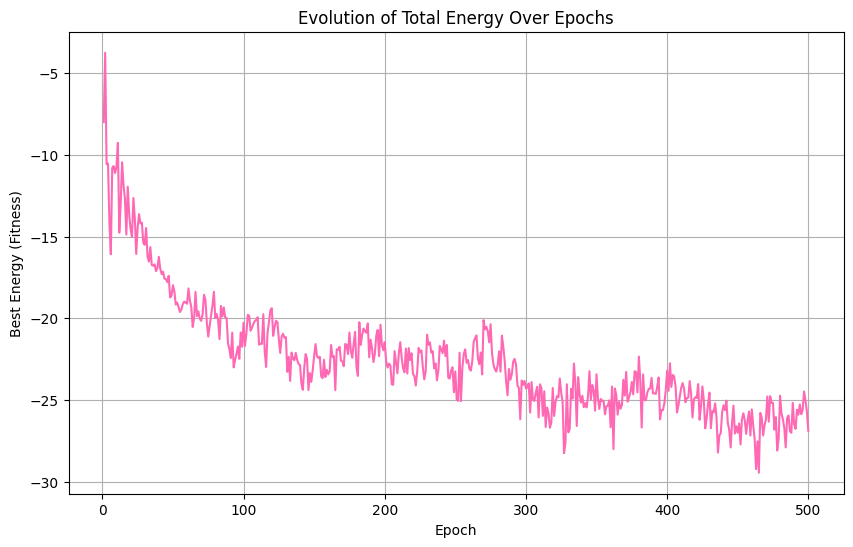

Posiciones óptimas de las partículas:
[[9.10932588 7.50529606 0.04715701]
 [3.18450277 3.87561035 8.67135395]
 [2.12910338 8.35854623 2.19718781]
 [3.48116812 2.6801566  9.8816852 ]
 [3.10390081 6.97564252 7.36881123]
 [6.33085746 4.11096542 2.85336962]
 [1.08245343 9.61952642 4.33624638]
 [3.82658046 0.87357357 6.39425515]
 [4.02498827 3.52685583 9.33849124]
 [4.06634594 2.7987543  2.23017874]
 [5.05976447 5.63272002 1.09022484]
 [6.94964179 1.3182839  6.69759801]
 [0.88986031 3.1465032  2.10133166]
 [3.69651003 0.23230818 1.92836324]
 [2.07546985 7.20364401 7.39993206]
 [9.94561422 5.81801195 1.07243419]
 [6.40754706 7.59125522 8.62847349]
 [9.65527886 6.0831429  9.22098383]
 [4.48567745 0.97211058 4.74321662]
 [2.60896399 8.15323731 7.04708657]
 [1.46513374 6.81763495 4.79352156]
 [6.71900922 2.32670644 1.85575175]
 [4.81702933 2.41037502 9.49162767]
 [3.03089426 0.05650793 3.71738023]
 [3.33835184 2.71962956 4.29882847]
 [3.68629789 2.662163   8.80722871]
 [3.14894441 8.19732401 5.

In [ ]:
#código 2
import numpy as np
import matplotlib.pyplot as plt

# Potencial de Lennard-Jones
def LennardJones(r, epsilon=1, sigma=1):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Energía total del sistema
def TotalEnergy(positions, epsilon=1, sigma=1):
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy

# Clase Robot
class Robot:
    def __init__(self, positions, Id=0, rate=0.1):
        self.Id = Id
        self.rate = rate
        self.positions = positions
        self.energy = TotalEnergy(self.positions)
        self.fitness = self.energy

    def Mutate(self):
        mutation = np.random.normal(loc=0., scale=self.rate, size=self.positions.shape)
        self.positions += mutation
        self.energy = TotalEnergy(self.positions)

    def SetFitness(self):
        self.fitness = self.energy

    def GetFitness(self):
        return self.fitness

    def GetPositions(self):
        return self.positions

def tournament_selection(robots, tournament_size=3):

    tournament = np.random.choice(robots, tournament_size)
    return min(tournament, key=lambda r: r.GetFitness())

def genetic_algorithm(num_robots, num_epochs, N):
    robots = [Robot(np.random.uniform(-5, 5, (N, 3))) for _ in range(num_robots)]

    best_fitness_per_epoch = []

    for epoch in range(num_epochs):
        for robot in robots:
            robot.Mutate()
            robot.SetFitness()

        robots = sorted(robots, key=lambda r: r.GetFitness())
        best_robot = robots[0]

        best_fitness_per_epoch.append(best_robot.GetFitness())
        print(f"Epoch {epoch + 1}/{num_epochs}, Best Energy: {best_robot.GetFitness()}")


        new_robots = []
        for _ in range(num_robots // 2):
            parent1 = tournament_selection(robots)
            parent2 = tournament_selection(robots)
            child_positions = (parent1.GetPositions() + parent2.GetPositions()) / 2
            new_robots.append(Robot(child_positions))

        robots = robots[:num_robots // 2] + new_robots

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(best_fitness_per_epoch) + 1), best_fitness_per_epoch, linestyle='-', color='hotpink')
    plt.xlabel('Epoch')
    plt.ylabel('Best Energy (Fitness)')
    plt.title('Evolution of Total Energy Over Epochs')
    plt.grid(True)
    plt.show()

    best_system = min(population, key=lambda x: x.GetEnergy())
    print("Posiciones óptimas de las partículas:")
    print(best_system.GetPositions())
    print("Energía mínima alcanzada:", best_system.GetEnergy())

# Parámetros
N = 50  # Número de partículas
num_robots = 50  # Número de robots (individuos)
num_epochs = 500  # Número de épocas


genetic_algorithm(num_robots, num_epochs, N)

In [ ]:
#por si acaso necesitamos el punto 7 en codigo

#parte a
import numpy as np

u1 = np.array([3, 1, 0, 1])
u2 = np.array([1, 2, 1, 1])
u3 = np.array([-1, 0, 2, -1])
b = np.array([-3, -3, 8, 9])

A = np.column_stack((u1, u2, u3))

AtA = A.T @ A
Atb = A.T @ b
x = np.linalg.solve(AtA, Atb)
projection = A @ x


#parte b

def gram_schmidt(vectores):
    base_ortonormal = []
    for v in vectores:
        v = v.astype(np.float64)
        for u in base_ortonormal:
            v -= np.dot(v, u) * u

        v = v / np.linalg.norm(v)
        base_ortonormal.append(v)
    return np.array(base_ortonormal)

u1 = np.array([3, 1, 0, 1])
u2 = np.array([1, 2, 1, 1])
u3 = np.array([-1, 0, 2, -1])
b = np.array([-3, -3, 8, 9])

base_ortonormal = gram_schmidt([u1, u2, u3])
c = [np.dot(b, v) for v in base_ortonormal]

# Calcular la proyección sin usar zip
proyeccion = np.zeros_like(b, dtype=np.float64)  # Inicializar con ceros
for i in range(len(base_ortonormal)):
    proyeccion += c[i] * base_ortonormal[i]

print("Base ortonormal:\n", base_ortonormal)
print("Coeficientes c:", c)
print("Proyección de b sobre el subespacio W:", proyeccion)

Base ortonormal:
 [[ 0.90453403  0.30151134  0.          0.30151134]
 [-0.32961713  0.75341057  0.51796977  0.2354408 ]
 [ 0.25633581 -0.26982716  0.78249877 -0.49918025]]
Coeficientes c: [-0.9045340337332908, 4.991345059088918, 1.8078419961176992]
Proyección de b sobre el subespacio W: [-2.00000000e+00  3.00000000e+00  4.00000000e+00  3.33066907e-16]
